#Q1
This project is a binary classification task using the UCI Heart Disease dataset.
The goal is to predict whether a patient has heart disease (response variable) based on 13 clinical features (predictor variables). In this process, we would transform the response variable 'num' into binary: 0 for no disease, 1 for presence of disease. This problem is important for early detection and prevention in a healthcare context.

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
dtype: float64


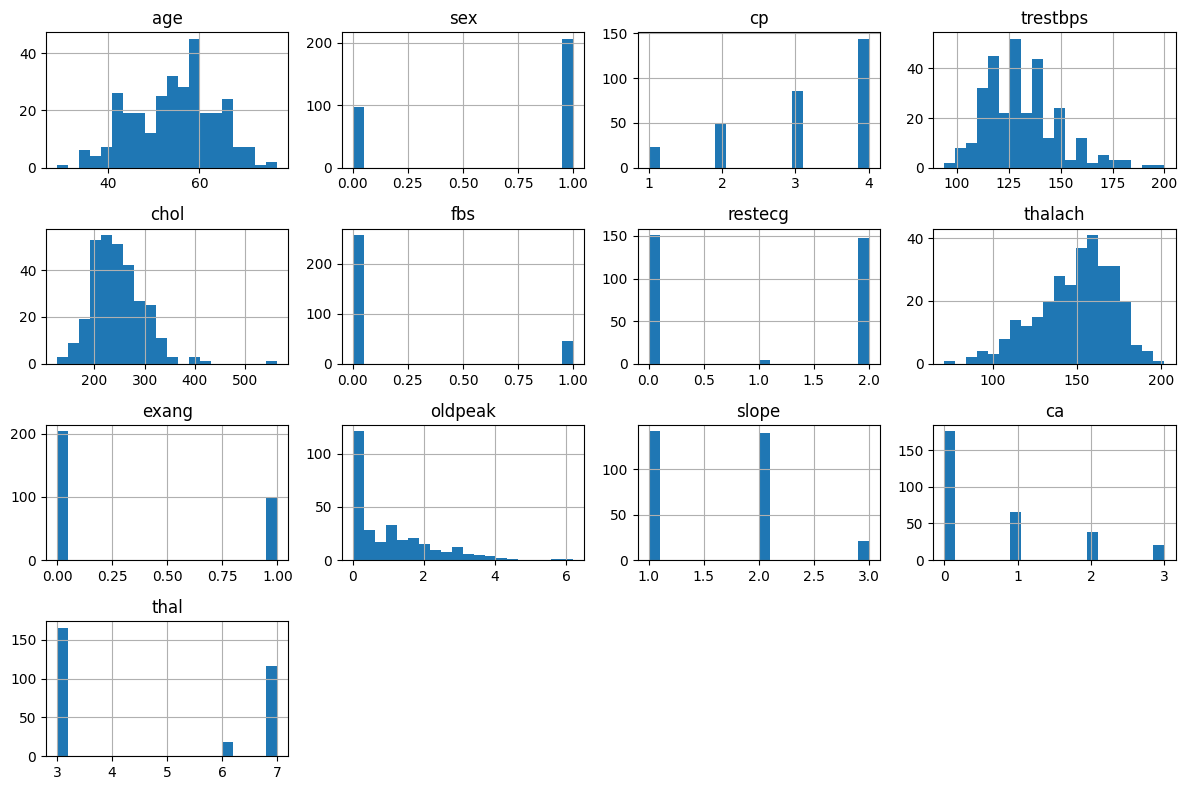

In [ ]:
#Q2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)

numeric_cols = X.select_dtypes(include='number').columns
print(X[numeric_cols].skew()) #observe skewness

X[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show() #observe distribution by graph

We inspected the skewness and distribution of numerical variables in the dataset. The majority of numerical features show only moderate skewness, while 'chol' and 'oldpeak' exhibited some skewness (both >1), which is not extreme. Hence, we decided not to apply any transformations to the data.


In [14]:
#Q3
print(X.info())
print(X.describe())
print(X.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9

Description:
1. The dataset contains 303 observations and 13 predictor variables, with a mix of numerical and categorical types.  
2. 8 variables (which are 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') are categorical, while other 5 ('age', 'trestbps, 'chol', 'thalach', and 'oldpeak') are numerical.
3. Some variables contain missing values (e.g., 'ca', 'thal'), and the overall dataset is well-structured for supervised classification tasks.

In [22]:
#Q4
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print(df['num'].value_counts())


num
0    164
1    139
Name: count, dtype: int64


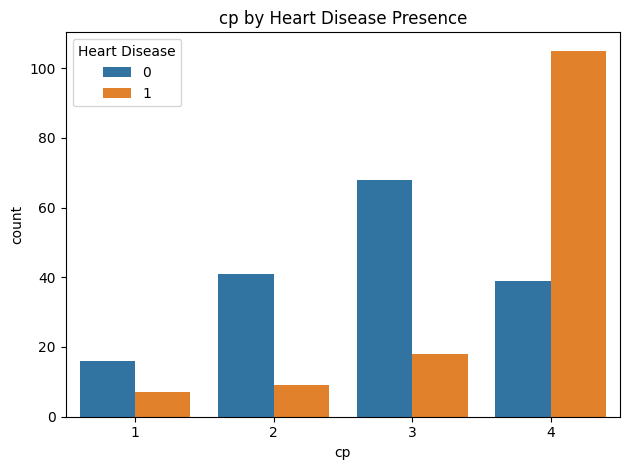

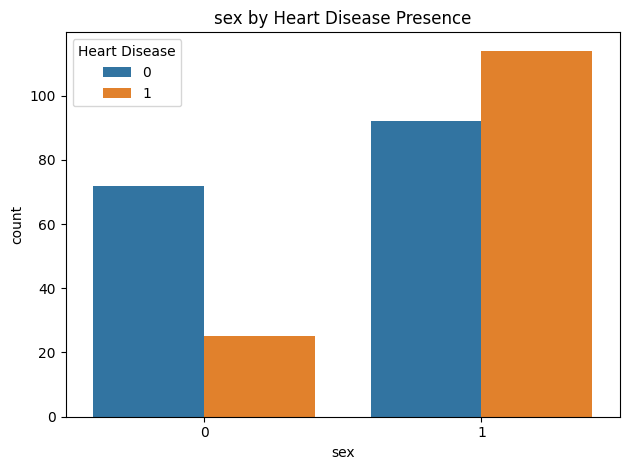

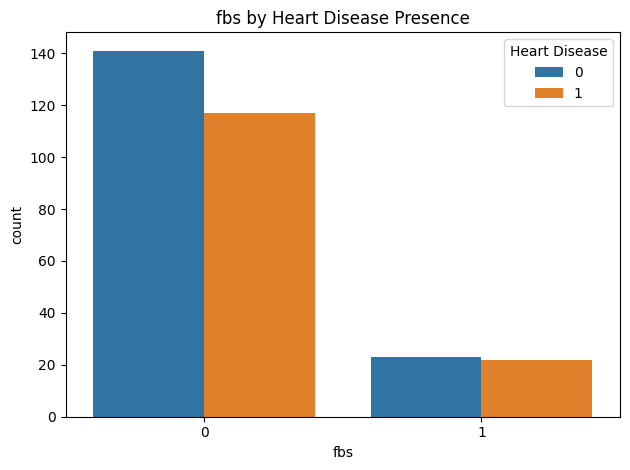

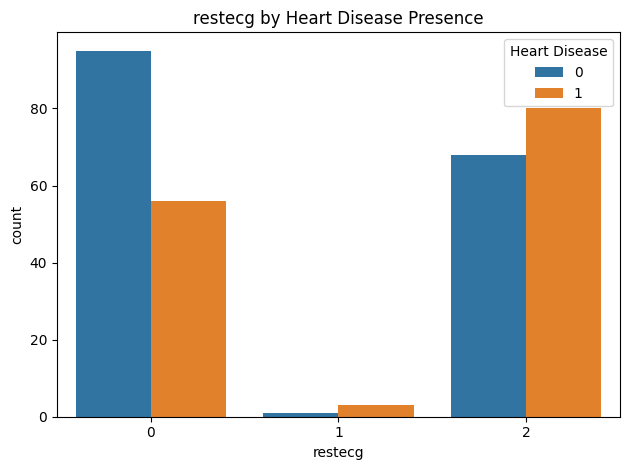

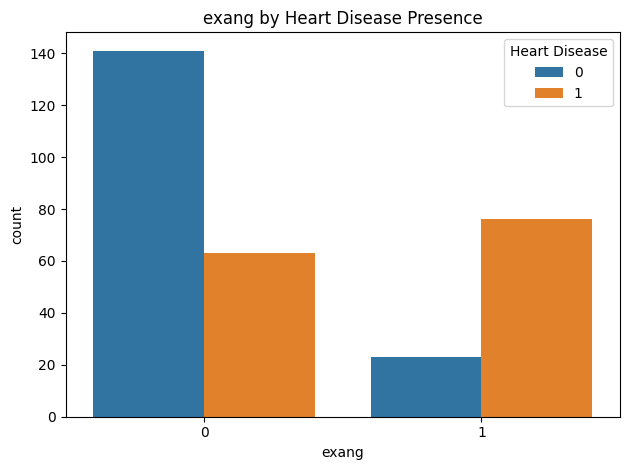

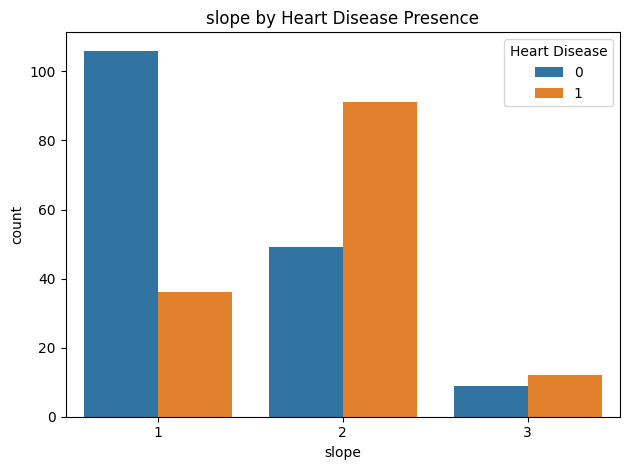

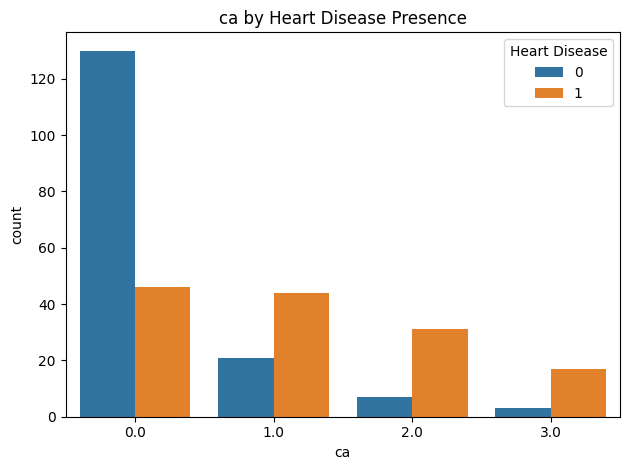

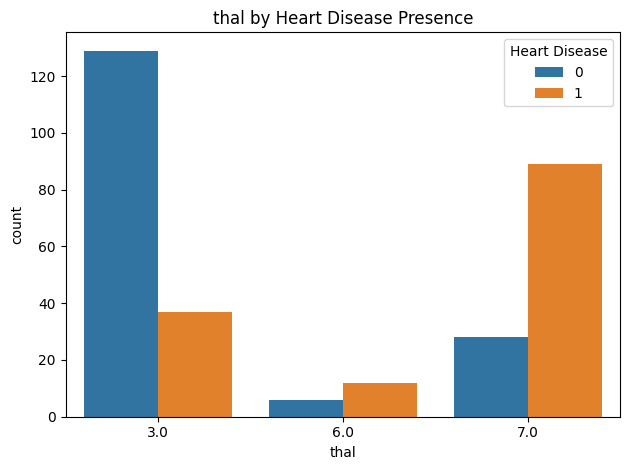

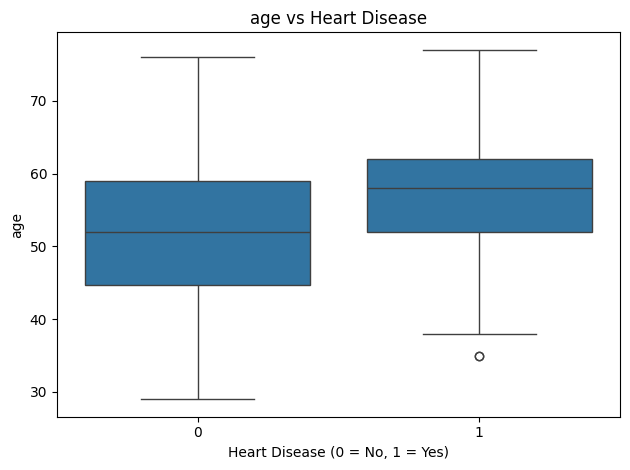

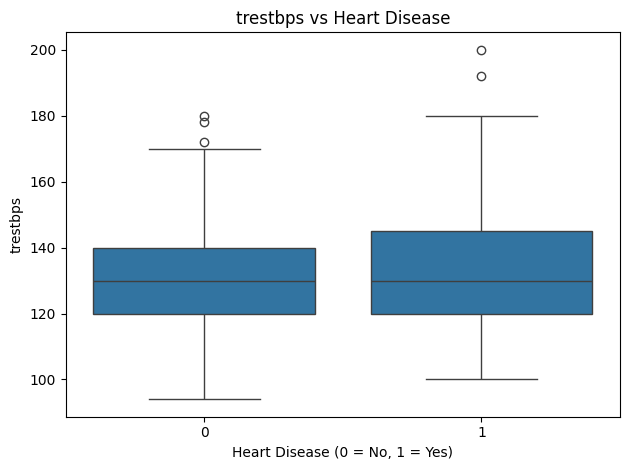

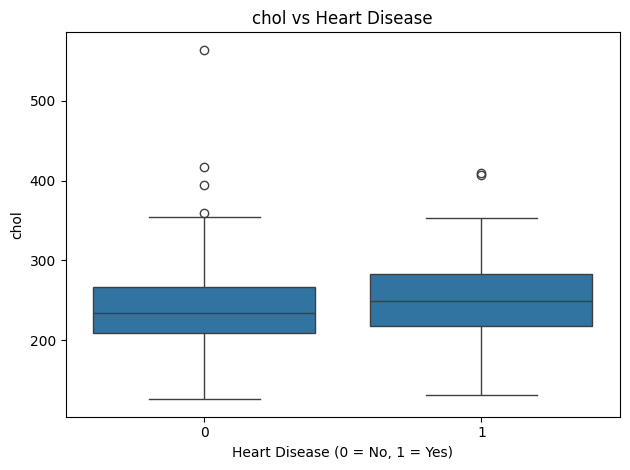

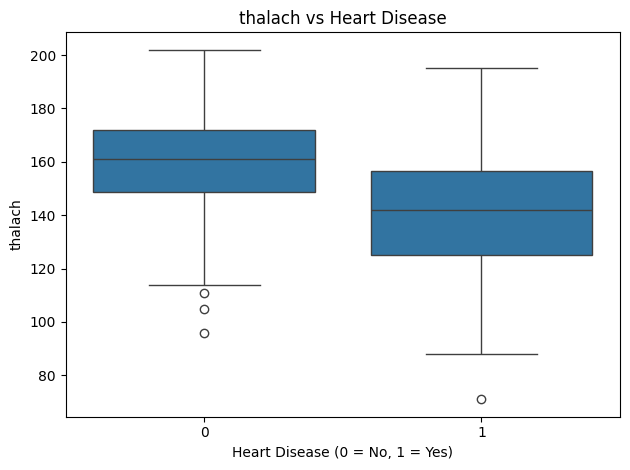

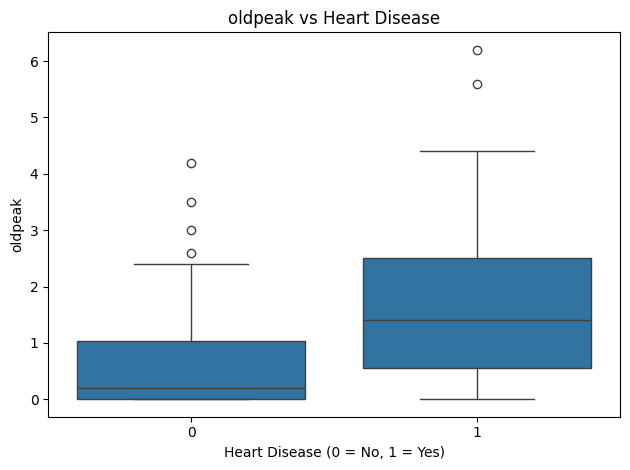

In [46]:
#Q5
import seaborn as sns
import matplotlib.pyplot as plt

categorical = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#use boxplot for numerical variables and countplot for categorical variables
for col in categorical:
    plt.figure()
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f"{col} by Heart Disease Presence")
    plt.xlabel(col)
    plt.legend(title="Heart Disease")
    plt.tight_layout()
    plt.show()
for col in numerical:
    plt.figure()
    sns.boxplot(x='num', y=col, data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.tight_layout()
    plt.show()


Categorical Variables:
'cp' (chest pain type), 'exang' (exercise-induced angina), 'slope'(slope of the peak exercise ST segment), 'ca' (vessel count), and 'thal' (defect type) display strong associations with heart disease presence. These features are valuable for prediction and should be considered in feature selection.

Numerical Variables:
'thalach' (maximum heart rate) is significantly lower, and 'oldpeak' (ST depression) is significantly higher in patients with heart disease. These are strong indicators of cardiovascular dysfunction.Other numerical features like 'age' and 'chol' show weaker or mixed relationships.

These insights suggest that 'cp', 'exang', 'slope', 'ca', 'thal', 'thalach', and 'oldpeak' are valuable features for prediction or selection.


In [30]:
#Q6
df_clean = df.dropna()
print(df_clean.shape[0])

297


297 observations left after dropping the missing values.

K=2, Silhouette Score = 0.387
K=3, Silhouette Score = 0.381
K=4, Silhouette Score = 0.338
K=5, Silhouette Score = 0.349
K=6, Silhouette Score = 0.345
K=7, Silhouette Score = 0.357
K=8, Silhouette Score = 0.315


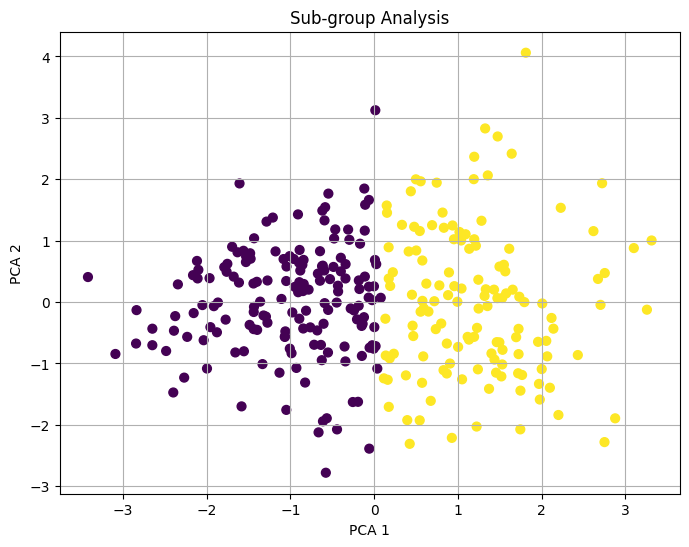

In [ ]:
#Q7
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_sub = df_clean[numerical_cols]# choose numerical Variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub) #standardize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) #in the dimension of 2 (for graphing)

#choose the best k for kmeans by silhouette score
from sklearn.metrics import silhouette_score
scores = []
k_range = range(2, 9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score = {score:.3f}")
#k=2 is the best one, which is also the natural one: no disease/have disease
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca) #k-means clustering with k=2
#graph
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=40)
plt.title("Sub-group Analysis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
